In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [5]:
ax1 =fig.add_subplot(2,2,1)

In [6]:
ax2 =fig.add_subplot(2,2,2)

In [7]:
ax3 =fig.add_subplot(2,2,3)

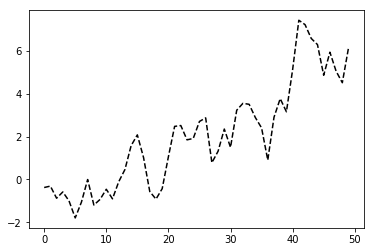

In [8]:
from numpy.random import randn
plt.plot(randn(50).cumsum(), 'k--')

In [9]:
_ = ax1.hist(randn(100), bins = 20, color = 'k', alpha = 0.3)

In [10]:
ax2.scatter(np.arange(30), np.arange(30) + 3*randn(30))

In [11]:
plt.show()

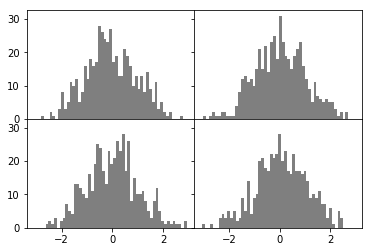

In [12]:
fig, axes = plt.subplots(2,2, sharex = True, sharey = True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

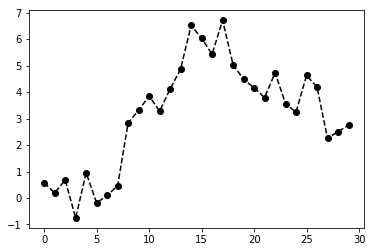

In [13]:
plt.plot(randn(30).cumsum(), 'ko--')

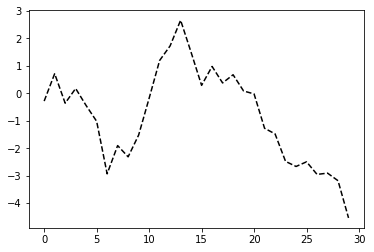

In [14]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')

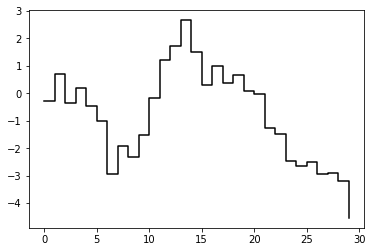

In [15]:
plt.plot(data, 'k-', label='steps-post', drawstyle = 'steps-post')

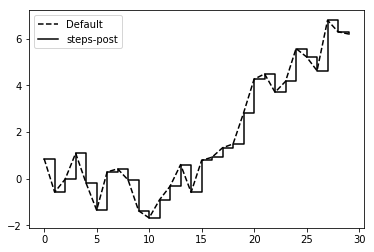

In [16]:
data = randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', label='steps-post', drawstyle = 'steps-post')
plt.legend(loc='best')

Text(0.5,0,'Stages')

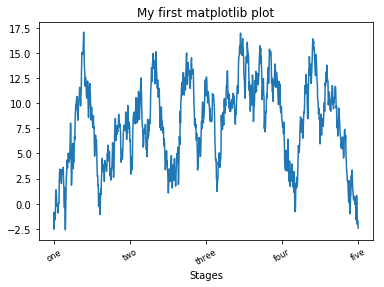

In [17]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum())
ticks = ax.set_xticks([0,250,500,750,1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')
ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

## 添加图例

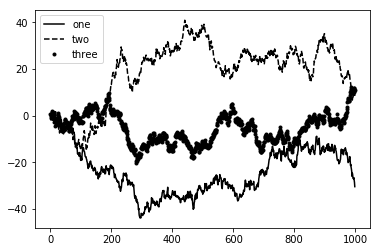

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum(),'k', label='one' )
ax.plot(randn(1000).cumsum(),'k--', label='two' )
ax.plot(randn(1000).cumsum(),'k.', label='three' )

ax.legend(loc='best')

In [19]:
import datetime as dt

In [20]:
from datetime import datetime

(600, 1800)

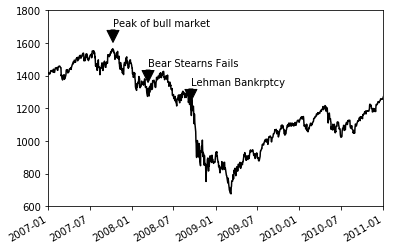

In [21]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data = pd.read_csv('spx.csv', index_col = 0, parse_dates = True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankrptcy')    
]

for date, label in crisis_data:
    ax.annotate(label, xy = (date, spx.asof(date) + 50),
               xytext = (date, spx.asof(date) + 200),
               arrowprops = dict(facecolor='black'),
               horizontalalignment = 'left',
               verticalalignment = 'top')

ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

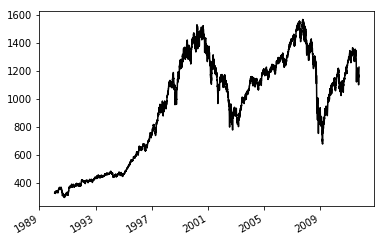

In [23]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data = pd.read_csv('spx.csv', index_col = 0, parse_dates = True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

### [绘制图形]

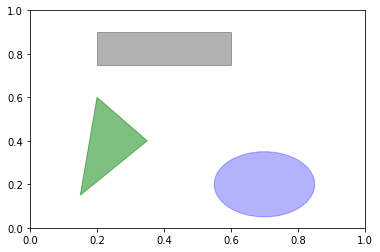

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

rect = plt.Rectangle((0.2,0.75), 0.4, 0.15, color = 'k', alpha=0.3)
circ = plt.Circle((.7,0.2), 0.15, color = 'b', alpha=.3)
pgon = plt.Polygon([[0.15,0.15], [.35,.4], [.2,.6]], color='g',alpha=.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
plt.savefig('figpath.png', dpi=400, bbox_inches = 'tight')

from io import BytesIO
buffer = BytesIO()  #TypeError: unicode argument expected, got 'str' 字符
plt.savefig(buffer)

plot_data = buffer.getvalue()

## 将图形保存到文件

In [25]:
plt.savefig('figpath.png', bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>

## 柱状图

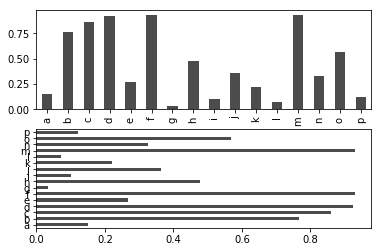

In [26]:
fig, axes = plt.subplots(2,1)
data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot(kind='bar', ax=axes[0], color='k', alpha=.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

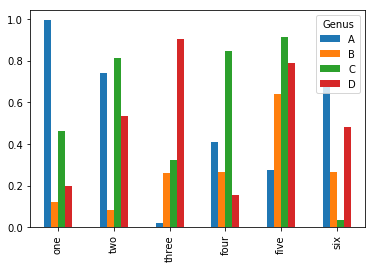

In [27]:
df = DataFrame(np.random.rand(6,4), index=['one', 'two','three','four','five','six'], columns=pd.Index(['A','B','C','D'], name='Genus'))
df.plot(kind='bar')

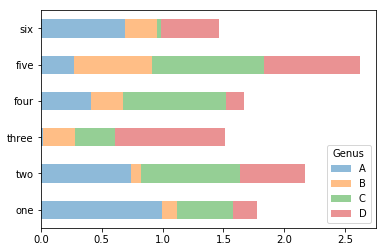

In [28]:
df.plot(kind='barh', stacked=True, alpha=0.5)

In [29]:
tips = pd.read_csv('tips.csv')
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [30]:
party_counts = party_counts.iloc[:,1:5]
party_pcts = party_counts.div(party_counts.sum(1).astype(float), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


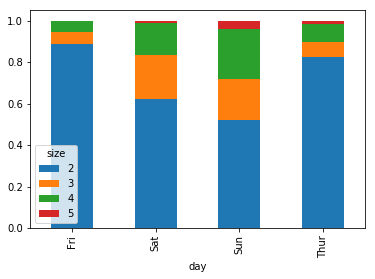

In [31]:
party_pcts.plot(kind='bar', stacked=True)

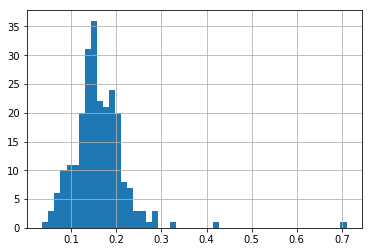

In [32]:
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips['tip_pct'].hist(bins=50)

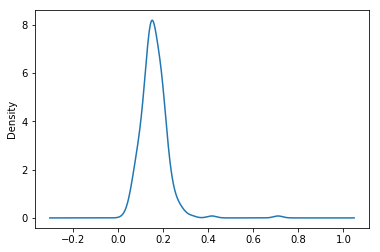

In [33]:
tips['tip_pct'].plot(kind='kde')

In [34]:
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)

values = Series(np.concatenate([comp1,comp2]))

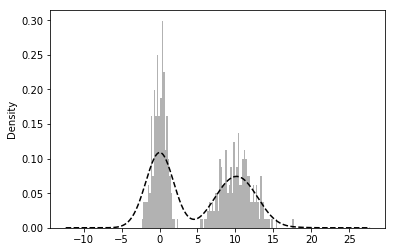

In [35]:
values.hist(bins=100, alpha = .3, color = 'k', density = True)
values.plot(kind='kde', style = 'k--')

In [36]:
macro = pd.read_csv('macrodata.csv')

In [37]:
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]

In [38]:
trans_data = np.log(data).diff().dropna()

In [39]:
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5,1,'Changes in log m1 vs. log unemp')

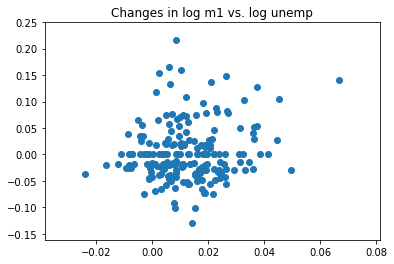

In [40]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Changes in log %s vs. log %s'% ('m1', 'unemp'))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0A873F10>,
      dtype=object)

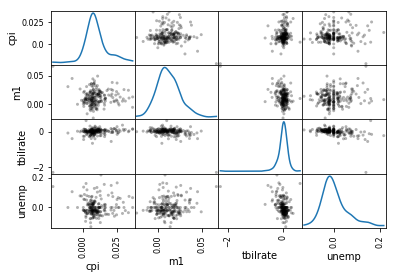

In [41]:
pd.plotting.scatter_matrix(trans_data, diagonal='kde', color='k', alpha=.3)

## 绘制地图：图形化显示海地地震危机数据

In [42]:
data = pd.read_csv('Haiti.csv')

In [43]:
data

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga O...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO
8,4038,No electricity in pernier,15/03/2010 10:58,Pernier,why the people who lives in pernier doesn't fi...,"2. Urgences logistiques | Vital Lines, 2f. San...",18.517443,-72.236841,YES,NO
9,4037,Shelter and food needed at Lamentin 54 and Rue...,15/03/2010 11:00,Intersection of Lamentin 54 and Rue St Juste,"GOOD EVENING ONG, I'M VERY HAPPY FOR THE AID Y...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.547790,-72.410010,YES,NO


In [44]:
data.columns

Index([u'Serial', u'INCIDENT TITLE', u'INCIDENT DATE', u'LOCATION',
       u'DESCRIPTION', u'CATEGORY', u'LATITUDE', u'LONGITUDE', u'APPROVED',
       u'VERIFIED'],
      dtype='object')

In [45]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']] [:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [46]:
data['CATEGORY'][:6].str.split(',')[0]

['1. Urgences | Emergency', ' 3. Public Health', ' ']

In [47]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [48]:
data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) & (data.LONGITUDE > -75) & (data.LONGITUDE < -70) & data.CATEGORY.notnull()]

In [49]:
data

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO
8,4038,No electricity in pernier,15/03/2010 10:58,Pernier,why the people who lives in pernier doesn't fi...,"2. Urgences logistiques | Vital Lines, 2f. San...",18.517443,-72.236841,YES,NO
9,4037,Shelter and food needed at Lamentin 54 and Rue...,15/03/2010 11:00,Intersection of Lamentin 54 and Rue St Juste,"GOOD EVENING ONG, I'M VERY HAPPY FOR THE AID Y...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.547790,-72.410010,YES,NO
10,4036,"Food needed, House collapsed in 1ere Section S...",15/03/2010 14:18,Assumed 1ere Section Salagnac and Salagnac de ...,"i'm living in Nip Department, First section sa...","1a. Highly vulnerable, 2. Urgences logistiques...",18.415000,-73.195000,YES,NO
11,4035,Clogged toilet in canape vert,19/03/2010 10:19,Canape Vert,Please give the message for with the concern O...,"4. Menaces | Security Threats, 4e. Assainissem...",18.539513,-72.327118,YES,NO
12,4034,Tent shelter and food needed on Lapot St. Carr...,22/03/2010 10:49,"unable to find street, mapped to Carrefour","We need tent, cover, rice. Uneted Nation never...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.534260,-72.408960,YES,NO


In [50]:
def to_cat_list(catstr):
	stripped = (x.strip() for x in catstr.split(','))
	return [x for x in stripped if x]

def get_all_categories(cat_series):
	cat_sets = (set(to_cat_list(x)) for x in cat_series)
	return sorted(set.union(*cat_sets))

def get_english(cat):
	code, names = cat.split('.')
	if '|' in names:
		names = names.split('|')[1]
	return code, names.strip()

In [51]:
all_cats = get_all_categories(data.CATEGORY)

#生成器表达式
english_mapping = dict(get_english(x) for x in all_cats)

english_mapping

{'1': 'Emergency',
 '1a': 'Highly vulnerable',
 '1b': 'Medical Emergency',
 '1c': 'People trapped',
 '1d': 'Fire',
 '2': 'Vital Lines',
 '2a': 'Food Shortage',
 '2b': 'Water shortage',
 '2c': 'Security Concern',
 '2d': 'Shelter needed',
 '2e': 'Fuel shortage',
 '2f': 'Power Outage',
 '3': 'Public Health',
 '3a': 'Infectious human disease',
 '3b': 'Chronic care needs',
 '3c': 'Medical equipment and supply needs',
 '3d': "OBGYN/Women's Health",
 '3e': 'Psychiatric need',
 '4': 'Security Threats',
 '4a': 'Looting',
 '4c': 'Group violence',
 '4e': 'Water sanitation and hygiene promotion',
 '5': 'Infrastructure Damage',
 '5a': 'Collapsed structure',
 '5b': 'Unstable Structure',
 '5c': 'Road blocked',
 '5d': 'Compromised bridge',
 '5e': 'Communication lines down',
 '6': 'Natural Hazards',
 '6a': 'Deaths',
 '6b': 'Missing Persons',
 '6c': 'Earthquake and aftershocks',
 '7': 'Services Available',
 '7a': 'Food distribution point',
 '7b': 'Water distribution point',
 '7c': 'Non-food aid distribu

In [52]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

In [53]:
all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))), index = data.index, columns = code_index)

In [54]:
dummy_frame.iloc[:, :6]

,1,1a,1b,1c,1d,2
0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row, codes] = 1


data = data.join(dummy_frame.add_prefix('category_'))

d:\python27\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [56]:
max(data.index)

3592L

In [57]:
data.index

Int64Index([   0,    4,    5,    6,    7,    8,    9,   10,   11,   12,
            ...
            3583, 3584, 3585, 3586, 3587, 3588, 3589, 3590, 3591, 3592],
           dtype='int64', length=3569)

In [58]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

In [59]:
def basic_haiti_map(ax = None, lllat=17.25, urlat=20.25, lllon=-75, urlon=-71):
	#创建极球投影的Basemap实例
	m = Basemap(ax=ax, projection = 'stere', lon_0 = (urlon + lllon)/2, lat_0 = (urlat + lllat)/2, llcrnrlat=lllat, urcrnrlat=urlat,
				llcrnrlon = lllon, urcrnrlon = urlon, resolution = 'f')
	m.drawcoastlines()
	m.drawstates()
	m.drawcountries()
	return m

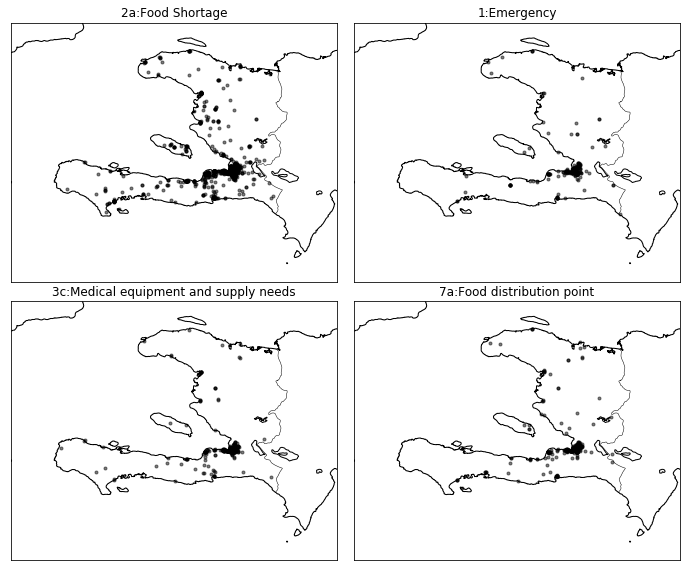

In [60]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
fig.subplots_adjust(hspace=0.05,wspace=0.05)

to_plot = ['2a','1','3c','7a']
lllat = 17.25;
urlat = 20.25; 
lllon=-75;
urlon=-71

for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat = lllat, urlat=urlat, lllon=lllon, urlon=urlon)
    cat_data = data[data['category_%s'%code] == 1]
    
    x, y = m(cat_data.LONGITUDE.values,cat_data.LATITUDE.values)
    m.plot(x,y,'k.',alpha=0.5)
    
    ax.set_title('%s:%s'%(code, english_mapping[code]))